<a href="https://colab.research.google.com/github/a-m-andrushko/Primes/blob/main/AF2_primes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [ ]:
def prime_algorithm(N, primes, composites, G):
  it = 2 # iteracja równa rozkładanej liczbie
  for i in range (2, N+1):
    edge_count = 0
    copy = it
    composites.append(it)
    G.add_node(it)
    isPrime = True
    while copy != 1:
      for Prime in primes:
        if copy % Prime == 0:
          copy /= Prime # nowa liczba, którą rozkładam na czynniki
          G.add_edge( it, Prime) # funkcja, która doda połączenie do grafu
          isPrime = False
          break # wyrwanie z pętli for
      if isPrime:
        primes.append(it) # dodanie do tablicy liczb pierwszych
        composites.pop()
        break
    it += 1

In [ ]:
G = nx.MultiDiGraph()
primes = []
composites = []
Pmax = 10 # ma być ostatecznie 50-100
N = 10000 # maksymalna liczba zbadanych liczb (541 to setna liczba pierwsza)
prime_algorithm(N, primes, composites, G)
pos=nx.bipartite_layout(G, primes, align='horizontal')
#nx.draw(G, pos=pos, with_labels=True)
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

In [ ]:
def model_algorithm(N, primes, composites, G):
  primes.append(2.) # warunek początkowy
  for n in range(3, N):
    G.add_node(n)
    isPrime = True
    composites.append(n)

    #KROK I
    for p_i in primes:
      if p_i <= math.sqrt(n):
        x = random.random()
        if x <= 1./p_i:  #prawdopodobienstwo
          isPrime=False
          p_connected=p_i
          #print("Polaczono w kroku 1 {} z {}".format(n, p_i))
          break
    #KROK II
    if not isPrime:
        G.add_edge(n, p_connected) #polaczenie z liczba pierwsza
        n_new = n #zmiana zakresu
        connected_again=False # jeśli nie zostanie ponownie polaczony to łączy sie z liczbą najbliższą do n_old
        n_old = n_new / p_connected
        for i in range (0, len(primes)-1):
            p=primes[i]
            n_old = n_new / p_connected
            if p_connected <= p and p <= math.sqrt(n_old): #[Rm, RM]
              x = random.random()
              if x <= 1./p: #prawdopodobienstwo
                G.add_edge(n, p)
                #print("Polaczono w kroku 2 {} z {}".format(n, p))
                n_new = n_old
                p_connected=p
                connected_again=True
                i=0
                n_old = n_new / p_connected
            #KROK III warunek a)
            elif p_connected > math.sqrt(n_old): # jeśli warunek spełniony to łączy sie z liczbą najbliższą do n_old
              for P in reversed(primes):
                if P <= n_old**2:
                  G.add_edge(n, P)
                  connected_again=True
                  #print("Polaczono w kroku 3 warunek a) {} z {}".format(n, P))
                  break
              break

        #KROK III warunek b)
        if not connected_again:
          for P in reversed(primes):
            if P <= n_old**2:
              #print("Polaczono w kroku 3 warunek b) {} z {}".format(n, P))
              G.add_edge(n, P)
              break


    if isPrime: #jesli nie mial zadnego polaczenia z innymi liczbami
      primes.append(n) # dodanie do tablicy liczb pierwszych
      composites.pop()


In [ ]:
model_N = 10000
model_primes = []
model_composites = []
model_G = nx.MultiDiGraph()
model_algorithm(model_N, model_primes, model_composites, model_G)
print(model_primes)
pos=nx.bipartite_layout(model_G, model_primes, align='horizontal')
#nx.draw(model_G, pos=pos, with_labels=True)

[2.0, 3, 4, 5, 6, 7, 10, 12, 15, 22, 26, 32, 33, 36, 43, 44, 45, 59, 61, 66, 71, 78, 92, 106, 114, 118, 119, 124, 139, 143, 144, 152, 158, 159, 160, 164, 170, 190, 191, 198, 201, 207, 211, 243, 253, 254, 265, 273, 275, 288, 298, 303, 314, 315, 339, 363, 366, 378, 382, 393, 394, 412, 420, 421, 424, 428, 437, 452, 468, 470, 472, 494, 502, 505, 509, 518, 524, 527, 529, 544, 553, 570, 578, 592, 601, 603, 614, 618, 623, 634, 638, 646, 665, 666, 673, 680, 709, 729, 737, 742, 751, 759, 760, 776, 783, 788, 798, 826, 838, 847, 851, 861, 864, 865, 890, 891, 910, 913, 917, 927, 937, 942, 944, 945, 949, 950, 957, 959, 972, 988, 989, 999, 1003, 1004, 1007, 1008, 1017, 1049, 1052, 1059, 1068, 1105, 1117, 1126, 1141, 1147, 1149, 1150, 1155, 1185, 1186, 1187, 1199, 1227, 1229, 1232, 1233, 1239, 1241, 1242, 1268, 1272, 1290, 1308, 1332, 1334, 1349, 1353, 1366, 1367, 1371, 1393, 1398, 1400, 1411, 1413, 1430, 1438, 1459, 1466, 1471, 1475, 1492, 1501, 1503, 1512, 1516, 1531, 1532, 1534, 1538, 1544, 1546, 

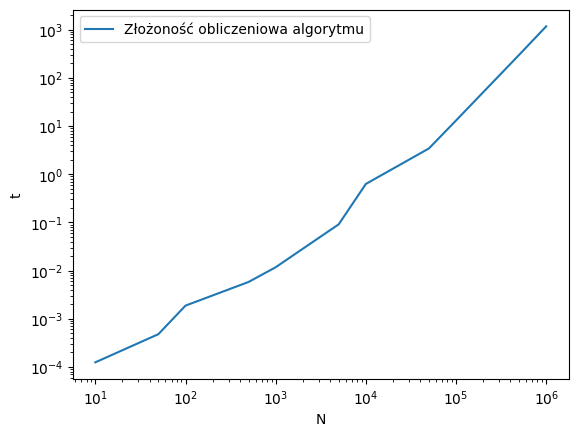

In [ ]:
# Badanie złożoności algorytmu
import time

N=[10, 50, 100, 500, 10**3, 5*10**3, 10**4, 5*10**4, 10**5, 5*10**5, 10**6]
t=[]

for i in N:
  G = nx.MultiDiGraph()
  primes = []
  composites = []
  start_time = time.time()
  prime_algorithm(i, primes, composites, G)
  t.append(time.time() - start_time)

plt.plot(N, t, label="Złożoność obliczeniowa algorytmu")
plt.xlabel("N")
plt.ylabel("t")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()


wspolczynnik dopasowania a= 1.393426638267606


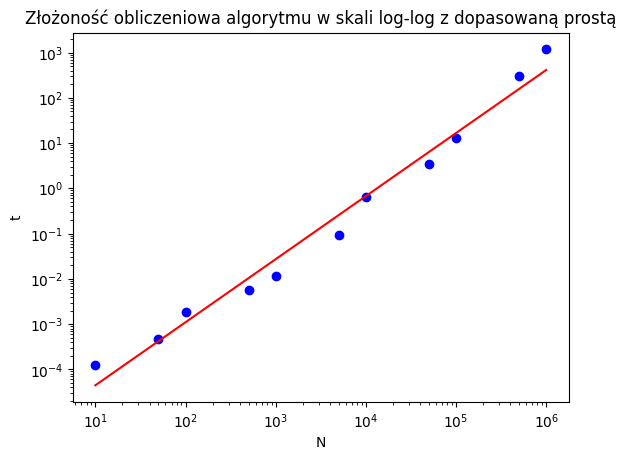

Nachylenie prostej= 1.393426638267606


In [ ]:
# DOPASOWANIE PROSTEJ DO WYKRESU ZŁOŻONOŚCI
log_N = np.log10(N)
log_t = np.log10(t)
coefficients = np.polyfit(log_N, log_t, 1)
fitted_line = np.polyval(coefficients, log_N)
print("wspolczynnik dopasowania a= {}".format(coefficients[0]))
plt.scatter(N, t, color='blue')
plt.plot(N, 10**fitted_line, color='red')
plt.xlabel('N')
plt.ylabel('t')
plt.xscale("log")
plt.yscale("log")
plt.title("Złożoność obliczeniowa algorytmu w skali log-log z dopasowaną prostą")
plt.show()
print("Nachylenie prostej= {}".format(coefficients[0]))

In [ ]:
# Dodanie Digrafu
D = nx.DiGraph()
for node in G.nodes:
  D.add_node(node)

for edge in (G.edges):
  if D.has_edge(edge[0], edge[1]):
    # inkrementacja wagi
    D[edge[0]][edge[1]]['weight'] += 1.
  else:
    D.add_edge(edge[0], edge[1], weight=1.)

#model
model_D = nx.DiGraph()
for node in model_G.nodes:
  model_D.add_node(node)

for edge in (model_G.edges):
  if model_D.has_edge(edge[0], edge[1]):
    # inkrementacja wagi
    model_D[edge[0]][edge[1]]['weight'] += 1.
  else:
    model_D.add_edge(edge[0], edge[1], weight=1.)

In [ ]:
print(primes)
print(composites)
all=list(range(2, int(primes[-1])+1, 1))
model_all=list(range(2, int(model_primes[-1])+1, 1))
print(all)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

In [ ]:
print(D.number_of_edges())
print(D.size(weight="weight"))

23071
30756.0


In [ ]:
# ROZKŁAD STOPNI WĘZŁÓW
P_p = []
P_2 = []
P_n = []

modelP_p = []
modelP_2 = []
modelP_n = []

for i in primes:
  P_p.append(D.degree(i))
for i in composites:
  P_2.append(D.degree(i))
for i in all:
  P_n.append(D.degree(i))

for i in model_primes:
  modelP_p.append(model_D.degree(i))
for i in model_composites:
  modelP_2.append(model_D.degree(i))
for i in model_all:
  modelP_n.append(model_D.degree(i))

elements, counts = np.unique(P_p, return_counts=True)
counts=counts/len(P_p)
P_p = dict(zip(elements, counts))
elements, counts = np.unique(P_n, return_counts=True)
counts=counts/len(P_n)
P_n = dict(zip(elements, counts))
elements, counts = np.unique(P_2, return_counts=True)
counts=counts/len(P_2)
P_2 = dict(zip(elements, counts))
print(P_p)
print(P_2)
print(P_n)

elements, counts = np.unique(modelP_p, return_counts=True)
counts=counts/len(modelP_p)
modelP_p = dict(zip(elements, counts))
elements, counts = np.unique(modelP_2, return_counts=True)
counts=counts/len(modelP_2)
modelP_2 = dict(zip(elements, counts))
elements, counts = np.unique(modelP_n, return_counts=True)
counts=counts/len(modelP_n)
modelP_n = dict(zip(elements, counts))

{0: 0.45565500406834825, 1: 0.16192026037428803, 2: 0.0838079739625712, 3: 0.05207485760781123, 4: 0.03417412530512612, 5: 0.029292107404393815, 6: 0.01708706265256306, 7: 0.014646053702196907, 8: 0.014646053702196907, 9: 0.010577705451586655, 10: 0.008136696501220505, 11: 0.007323026851098454, 12: 0.007323026851098454, 13: 0.004882017900732303, 14: 0.005695687550854353, 15: 0.005695687550854353, 16: 0.004882017900732303, 17: 0.0016273393002441008, 18: 0.0032546786004882017, 19: 0.0032546786004882017, 20: 0.0032546786004882017, 21: 0.0024410089503661514, 22: 0.0032546786004882017, 23: 0.0016273393002441008, 24: 0.0016273393002441008, 25: 0.0024410089503661514, 26: 0.0016273393002441008, 27: 0.0024410089503661514, 28: 0.0008136696501220504, 29: 0.0008136696501220504, 30: 0.0016273393002441008, 31: 0.0016273393002441008, 33: 0.0008136696501220504, 34: 0.0016273393002441008, 35: 0.0016273393002441008, 36: 0.0008136696501220504, 37: 0.0016273393002441008, 38: 0.0008136696501220504, 40: 0.0

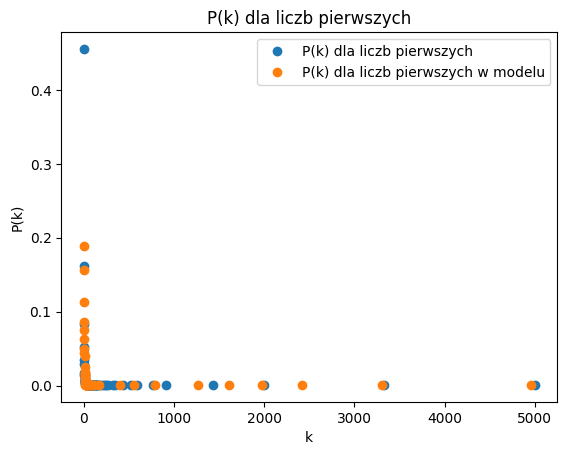

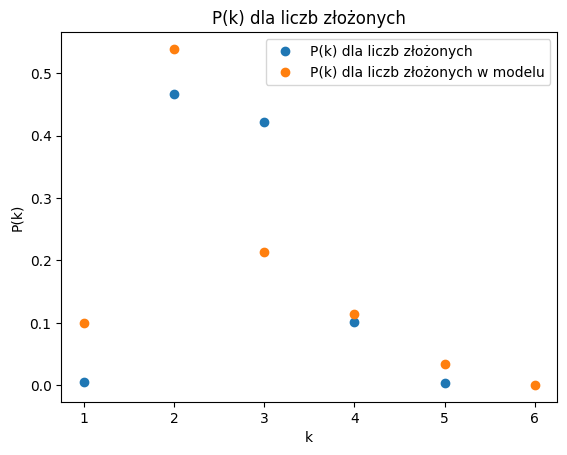

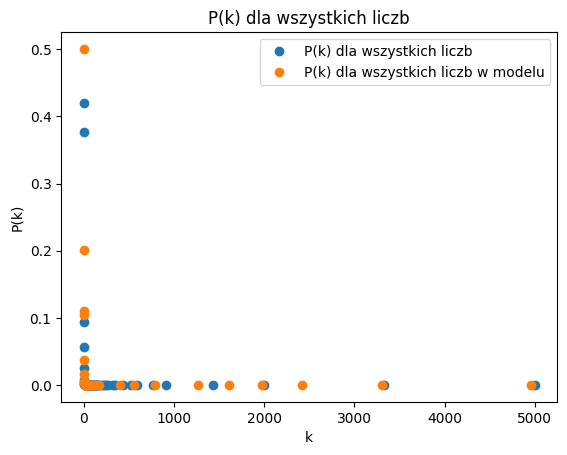

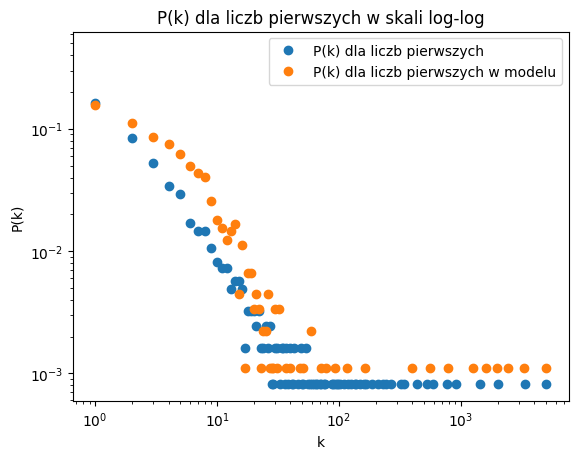

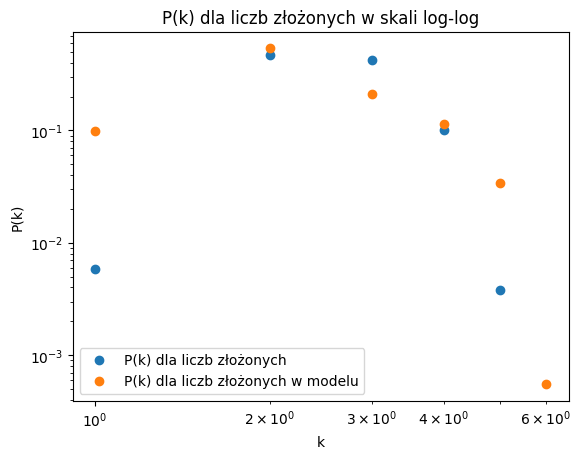

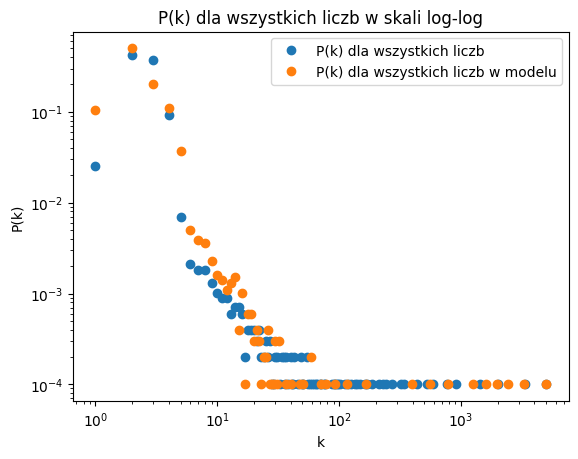

In [ ]:
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla liczb pierwszych')
plt.plot(P_p.keys(), P_p.values(), 'o', label="P(k) dla liczb pierwszych")
plt.plot(modelP_p.keys(), modelP_p.values(), 'o', label="P(k) dla liczb pierwszych w modelu")
plt.legend()
plt.show()

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla liczb złożonych')
plt.plot(P_2.keys(), P_2.values(), 'o', label="P(k) dla liczb złożonych")
plt.plot(modelP_2.keys(), modelP_2.values(), 'o', label="P(k) dla liczb złożonych w modelu")
plt.legend()
plt.show()

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla wszystkich liczb')
plt.plot(P_n.keys(), P_n.values(), 'o', label="P(k) dla wszystkich liczb")
plt.plot(modelP_n.keys(), modelP_n.values(), 'o', label="P(k) dla wszystkich liczb w modelu")
plt.legend()
plt.show()

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla liczb pierwszych w skali log-log')
plt.plot(P_p.keys(), P_p.values(), 'o', label="P(k) dla liczb pierwszych")
plt.plot(modelP_p.keys(), modelP_p.values(), 'o', label="P(k) dla liczb pierwszych w modelu")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla liczb złożonych w skali log-log')
plt.plot(P_2.keys(), P_2.values(), 'o', label="P(k) dla liczb złożonych")
plt.plot(modelP_2.keys(), modelP_2.values(), 'o', label="P(k) dla liczb złożonych w modelu")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla wszystkich liczb w skali log-log')
plt.plot(P_n.keys(), P_n.values(), 'o', label="P(k) dla wszystkich liczb")
plt.plot(modelP_n.keys(), modelP_n.values(), 'o', label="P(k) dla wszystkich liczb w modelu")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

{0.0: 0.45565500406834825, 1.0: 0.16192026037428803, 2.0: 0.0838079739625712, 3.0: 0.05207485760781123, 4.0: 0.03417412530512612, 5.0: 0.029292107404393815, 6.0: 0.01708706265256306, 7.0: 0.014646053702196907, 8.0: 0.014646053702196907, 9.0: 0.010577705451586655, 10.0: 0.008136696501220505, 11.0: 0.007323026851098454, 12.0: 0.007323026851098454, 13.0: 0.004882017900732303, 14.0: 0.005695687550854353, 15.0: 0.005695687550854353, 16.0: 0.004882017900732303, 17.0: 0.0016273393002441008, 18.0: 0.0032546786004882017, 19.0: 0.0032546786004882017, 20.0: 0.0032546786004882017, 21.0: 0.0024410089503661514, 22.0: 0.0032546786004882017, 23.0: 0.0016273393002441008, 24.0: 0.0016273393002441008, 25.0: 0.0024410089503661514, 26.0: 0.0016273393002441008, 27.0: 0.0024410089503661514, 28.0: 0.0008136696501220504, 29.0: 0.0008136696501220504, 30.0: 0.0016273393002441008, 31.0: 0.0016273393002441008, 33.0: 0.0008136696501220504, 34.0: 0.0016273393002441008, 35.0: 0.0016273393002441008, 36.0: 0.0008136696

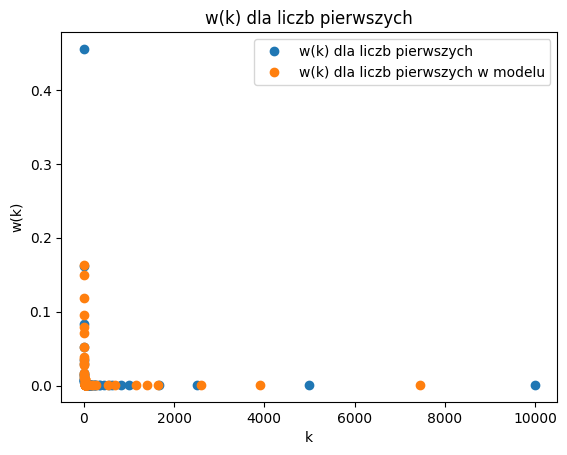

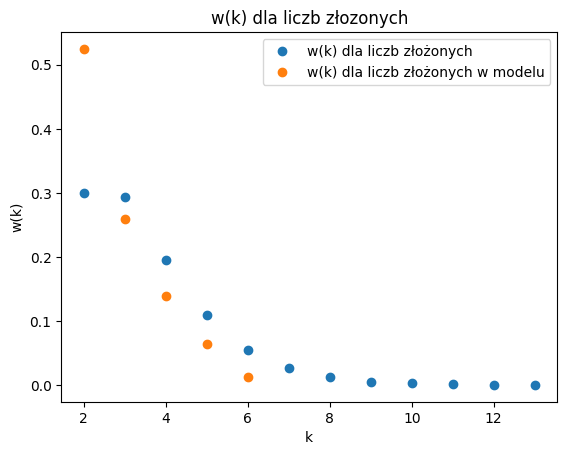

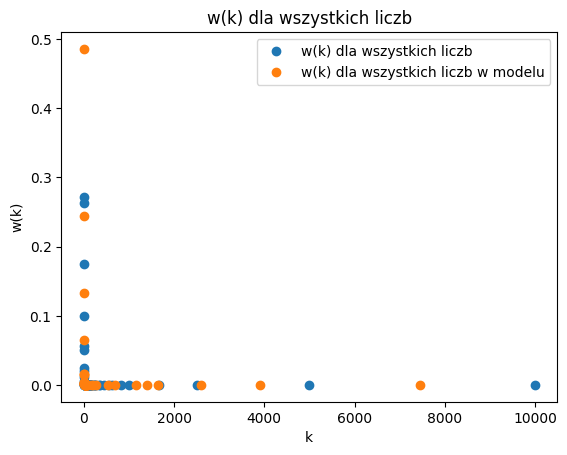

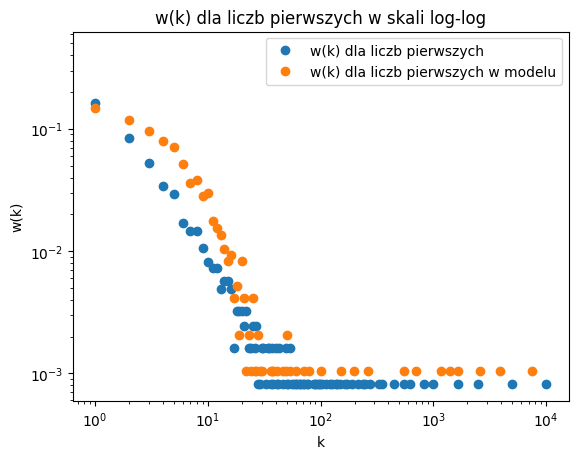

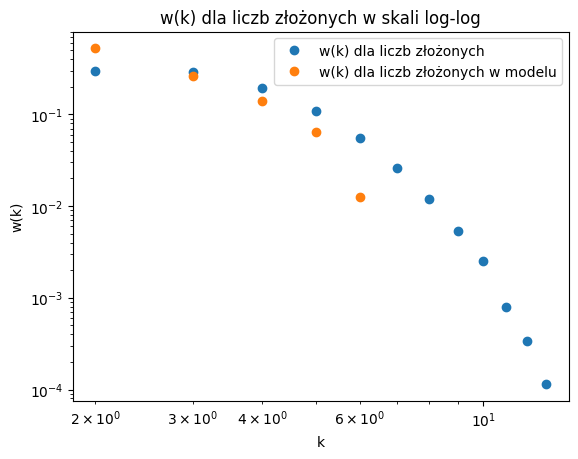

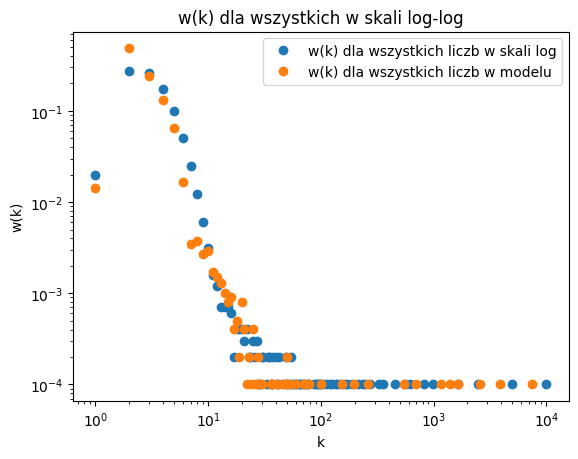

In [ ]:
# ROZKŁAD WAG WCHODZĄCYCH DO WĘZŁA
w_p = []
w_2 = []
w_n = []
model_w_p = []
model_w_2 = []
model_w_n = []
for i in primes:
  w_p.append(D.degree(i, weight='weight'))
for i in composites:
  w_2.append(D.degree(i, weight='weight'))
for i in all:
  w_n.append(D.degree(i, weight='weight'))
for i in model_primes:
  model_w_p.append(model_D.degree(i, weight='weight'))
for i in model_composites:
  model_w_2.append(model_D.degree(i, weight='weight'))
for i in model_all:
  model_w_n.append(model_D.degree(i, weight='weight'))

elements, counts = np.unique(w_p, return_counts=True)
counts=counts/len(w_p)
w_p = dict(zip(elements, counts))
elements, counts = np.unique(w_n, return_counts=True)
counts=counts/len(w_n)
w_n = dict(zip(elements, counts))
elements, counts = np.unique(w_2, return_counts=True)
counts=counts/len(w_2)
w_2 = dict(zip(elements, counts))
elements, counts = np.unique(model_w_p, return_counts=True)
counts=counts/len(model_w_p)
model_w_p = dict(zip(elements, counts))
elements, counts = np.unique(model_w_2, return_counts=True)
counts=counts/len(model_w_2)
model_w_2 = dict(zip(elements, counts))
elements, counts = np.unique(model_w_n, return_counts=True)
counts=counts/len(model_w_n)
model_w_n = dict(zip(elements, counts))

print(w_p)
print(w_2)
print(w_n)
plt.xlabel('k')
plt.ylabel('w(k)')
plt.title('w(k) dla liczb pierwszych')
plt.plot(w_p.keys(), w_p.values(), 'o', label="w(k) dla liczb pierwszych")
plt.plot(model_w_p.keys(), model_w_p.values(), 'o', label="w(k) dla liczb pierwszych w modelu")
plt.legend()
plt.show()

plt.xlabel('k')
plt.ylabel('w(k)')
plt.title('w(k) dla liczb złozonych')
plt.plot(w_2.keys(), w_2.values(), 'o', label="w(k) dla liczb złożonych")
plt.plot(model_w_2.keys(), model_w_2.values(), 'o', label="w(k) dla liczb złożonych w modelu")
plt.legend()
plt.show()

plt.xlabel('k')
plt.ylabel('w(k)')
plt.title('w(k) dla wszystkich liczb')
plt.plot(w_n.keys(), w_n.values(), 'o', label="w(k) dla wszystkich liczb")
plt.plot(model_w_n.keys(), model_w_n.values(), 'o', label="w(k) dla wszystkich liczb w modelu")
plt.legend()
plt.show()

plt.xlabel('k')
plt.ylabel('w(k)')
plt.title('w(k) dla liczb pierwszych w skali log-log')
plt.plot(w_p.keys(), w_p.values(), 'o', label="w(k) dla liczb pierwszych")
plt.plot(model_w_p.keys(), model_w_p.values(), 'o', label="w(k) dla liczb pierwszych w modelu")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()


plt.xlabel('k')
plt.ylabel('w(k)')
plt.title('w(k) dla liczb złożonych w skali log-log')
plt.plot(w_2.keys(), w_2.values(), 'o', label="w(k) dla liczb złożonych")
plt.plot(model_w_2.keys(), model_w_2.values(), 'o', label="w(k) dla liczb złożonych w modelu")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.xlabel('k')
plt.ylabel('w(k)')
plt.title('w(k) dla wszystkich w skali log-log')
plt.plot(w_n.keys(), w_n.values(), 'o', label="w(k) dla wszystkich liczb w skali log")
plt.plot(model_w_n.keys(), model_w_n.values(), 'o', label="w(k) dla wszystkich liczb w modelu")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

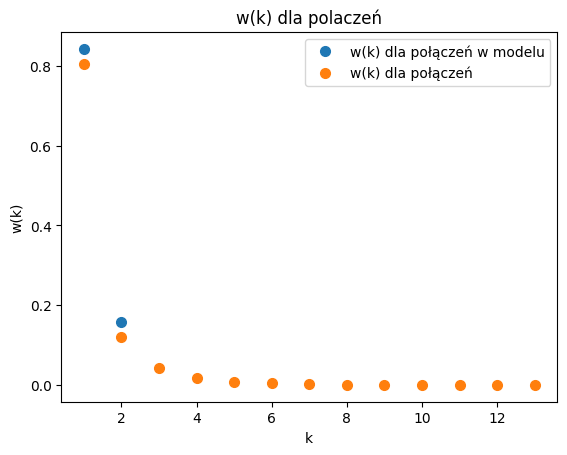

In [ ]:
# ROZKŁAD WAG POŁĄCZEŃ
w=[]
for i in D.edges(data="weight"):
  w.append(i[2])

model_w=[]
for i in model_D.edges(data="weight"):
  model_w.append(i[2])

elements, counts = np.unique(w, return_counts=True)
counts=counts/len(w)
w = dict(zip(elements, counts))
elements, counts = np.unique(model_w, return_counts=True)
counts=counts/len(model_w)
model_w = dict(zip(elements, counts))
plt.xlabel('k')
plt.ylabel('w(k)')
plt.title('w(k) dla polaczeń')
plt.plot(model_w.keys(), model_w.values(), 'o',  markersize=7, label="w(k) dla połączeń w modelu")
plt.plot(w.keys(), w.values(),   'o', markersize=7, label="w(k) dla połączeń")
plt.legend()
plt.show()

In [ ]:
#dopasowanie
del P_p[0] # USUWAM PIERWSZY key, KTÓRY JEST 0 I POWODUJE BŁĄD
del P_n[0] # USUWAM PIERWSZY key, KTÓRY JEST 0 I POWODUJE BŁĄD
del modelP_p[0] # USUWAM PIERWSZY key, KTÓRY JEST 0 I POWODUJE BŁĄD
del modelP_n[0] # USUWAM PIERWSZY key, KTÓRY JEST 0 I POWODUJE BŁĄD

p_keys = (list(P_p.keys()))
p_values = (list(P_p.values()))

n_keys = (list(P_n.keys()))
n_values = (list(P_n.values()))

p2_keys = (list(P_2.keys()))
p2_values = (list(P_2.values()))

model_p_keys = (list(modelP_p.keys()))
model_p_values = (list(modelP_p.values()))

model_n_keys = (list(modelP_n.keys()))
model_n_values = (list(modelP_n.values()))

model_2_keys = (list(modelP_2.keys()))
model_2_values = (list(modelP_2.values()))

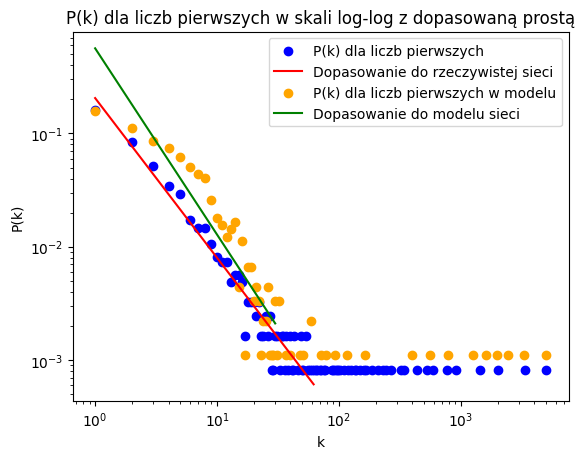

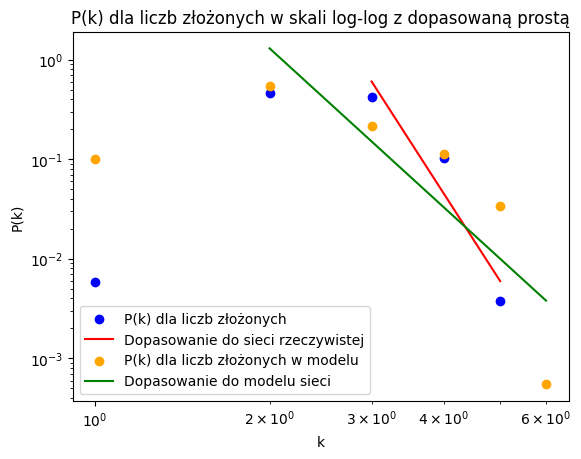

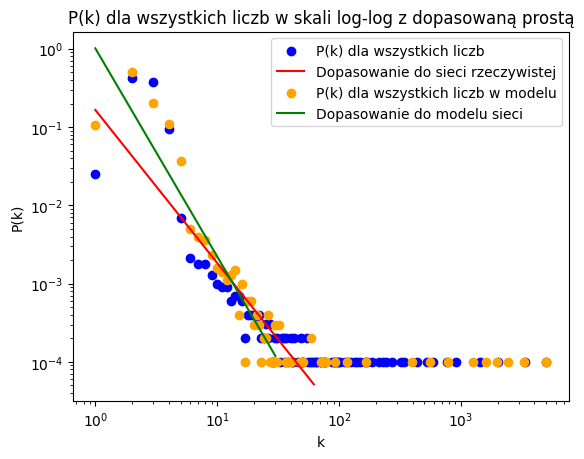

Nachylenie prostej dopasowanej do P(k) dla liczb pierwszych -1.4079788472452517
Nachylenie prostej dopasowanej do P(k) dla liczb złożonych -9.033404789948532
Nachylenie prostej dopasowanej do P(k) dla wszystkich liczb -1.9558469091068058
Nachylenie prostej dopasowanej do P(k) dla liczb pierwszych w modelu -1.6420153265955553
Nachylenie prostej dopasowanej do P(k) dla liczb złożonych w modelu -5.3095699868118444
Nachylenie prostej dopasowanej do P(k) dla wszystkich liczb w modelu -2.660852675763789


In [ ]:
# DOPASOWANIE PROSTEJ
coefficients = np.polyfit(np.log10(p_keys[:50]), np.log10(p_values[:50]), 1)
fitted_line = np.polyval(coefficients, np.log10(p_keys[:50]))
plt.scatter(p_keys, p_values, color='blue', label="P(k) dla liczb pierwszych")
plt.plot(p_keys[:50], 10**fitted_line, color='red', label="Dopasowanie do rzeczywistej sieci")

model_coefficients = np.polyfit(np.log10(model_p_keys[:30]), np.log10(model_p_values[:30]), 1)
model_fitted_line = np.polyval(model_coefficients, np.log10(model_p_keys[:30]))
plt.scatter(model_p_keys, model_p_values, color='orange', label="P(k) dla liczb pierwszych w modelu")
plt.plot(model_p_keys[:30], 10**model_fitted_line, color='green', label="Dopasowanie do modelu sieci")
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla liczb pierwszych w skali log-log z dopasowaną prostą')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

slope_p = coefficients[0]
model_slope_p=model_coefficients[0]

coefficients = np.polyfit(np.log10(p2_keys[2:50]), np.log10(p2_values[2:50]), 1)
fitted_line = np.polyval(coefficients, np.log10(p2_keys[2:50]))
plt.scatter(p2_keys, p2_values, color='blue', label="P(k) dla liczb złożonych")
plt.plot(p2_keys[2:50], 10**fitted_line, color='red',  label="Dopasowanie do sieci rzeczywistej")

model_coefficients = np.polyfit(np.log10(model_2_keys[1:30]), np.log10(model_2_values[1:30]), 1)
model_fitted_line = np.polyval(model_coefficients, np.log10(model_2_keys[1:30]))
plt.scatter(model_2_keys, model_2_values, color='orange', label="P(k) dla liczb złożonych w modelu")
plt.plot(model_2_keys[1:30], 10**model_fitted_line, color='green', label="Dopasowanie do modelu sieci" )
plt.legend()
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla liczb złożonych w skali log-log z dopasowaną prostą')
plt.xscale("log")
plt.yscale("log")
plt.show()
slope_2 = coefficients[0]
model_slope_2 = model_coefficients[0]

coefficients = np.polyfit(np.log10(n_keys[:50]), np.log10(n_values[:50]), 1)
fitted_line = np.polyval(coefficients, np.log10(n_keys[:50]))
plt.scatter(n_keys, n_values, color='blue', label="P(k) dla wszystkich liczb")
plt.plot(n_keys[:50], 10**fitted_line, color='red', label="Dopasowanie do sieci rzeczywistej")


model_coefficients = np.polyfit(np.log10(model_n_keys[:30]), np.log10(model_n_values[:30]), 1)
model_fitted_line = np.polyval(model_coefficients, np.log10(model_n_keys[:30]))
plt.scatter(model_n_keys, model_n_values, color='orange', label="P(k) dla wszystkich liczb w modelu")
plt.plot(model_n_keys[:30], 10**model_fitted_line, color='green', label="Dopasowanie do modelu sieci")
plt.legend()
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('P(k) dla wszystkich liczb w skali log-log z dopasowaną prostą')
plt.xscale("log")
plt.yscale("log")
plt.show()
slope_n = coefficients[0]
model_slope_n = model_coefficients[0]

print("Nachylenie prostej dopasowanej do P(k) dla liczb pierwszych {}".format(slope_p))
print("Nachylenie prostej dopasowanej do P(k) dla liczb złożonych {}".format(slope_2))
print("Nachylenie prostej dopasowanej do P(k) dla wszystkich liczb {}".format(slope_n))

print("Nachylenie prostej dopasowanej do P(k) dla liczb pierwszych w modelu {}".format(model_slope_p))
print("Nachylenie prostej dopasowanej do P(k) dla liczb złożonych w modelu {}".format(model_slope_2))
print("Nachylenie prostej dopasowanej do P(k) dla wszystkich liczb w modelu {}".format(model_slope_n))

In [ ]:
# ALGORYTM DO ZNAJDYWANIA <P(k)>
def binning(P_p, all):
  all = [1] + all
  power = 0
  suma = 0
  count = 0
  N_avg = {}
  for k in all:
    if k <= 2 ** power:
      if k in P_p:
        suma = suma + P_p[k]
        count = count + 1
      else:
        suma = suma + 0
        count = count + 1
    else:
      N_avg[2 ** power] = suma / count
      suma = 0
      count = 0
      if k in P_p:
        suma = suma + P_p[k]
        count = count + 1
      else:
        suma = suma + 0
        count = count + 1
      power = power + 1
  del all[0] # USINIĘCIE SZTUCZNIE DODANEJ LICZBY 1
  return (N_avg)

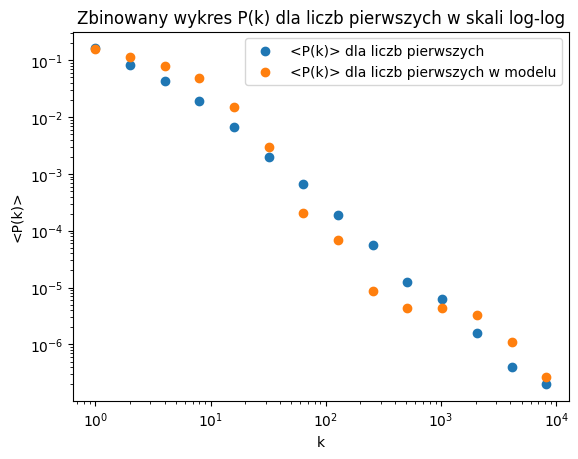

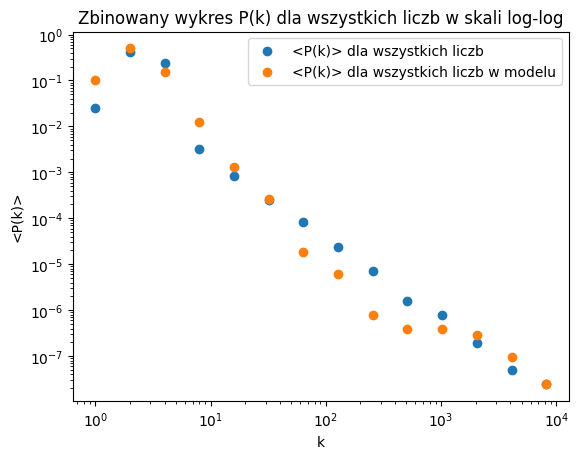

In [ ]:
plt.xlabel('k')
plt.ylabel('<P(k)>')
plt.title('Zbinowany wykres P(k) dla liczb pierwszych w skali log-log')
N_avg_p=binning(P_p, all)
N_avg_model_p=binning(modelP_p, model_all)
plt.scatter(N_avg_p.keys(), N_avg_p.values(), label="<P(k)> dla liczb pierwszych")
plt.scatter(N_avg_model_p.keys(), N_avg_model_p.values(), label="<P(k)> dla liczb pierwszych w modelu")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()


plt.xlabel('k')
plt.ylabel('<P(k)>')
plt.title('Zbinowany wykres P(k) dla wszystkich liczb w skali log-log')
N_avg_n=binning(P_n, all)
N_avg_model_n=binning(modelP_n, model_all)
plt.scatter(N_avg_n.keys(), N_avg_n.values(), label="<P(k)> dla wszystkich liczb")
plt.scatter(N_avg_model_n.keys(), N_avg_model_n.values(), label="<P(k)> dla wszystkich liczb w modelu")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()


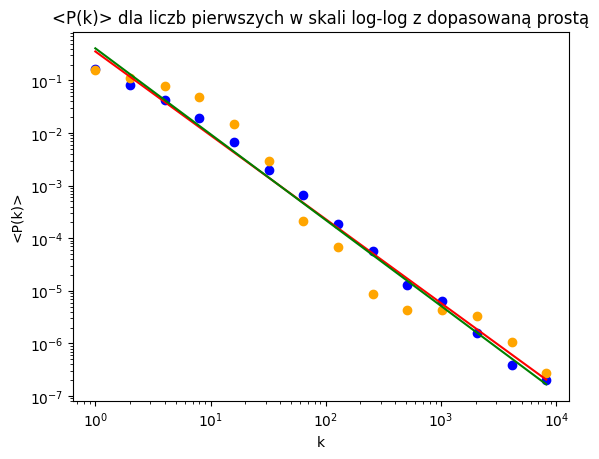

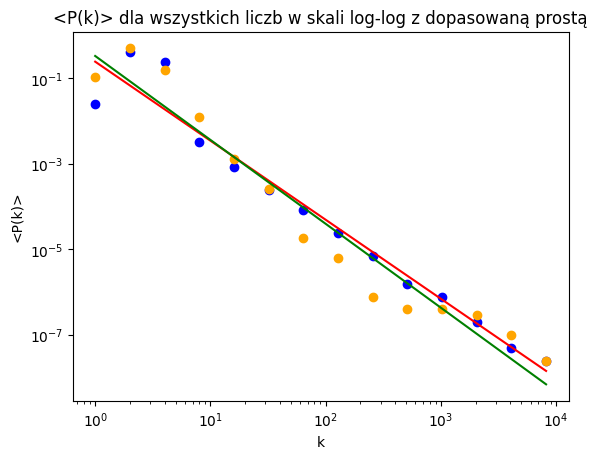

Nachylenie prostej dopasowanej do zbinowanego P(k) dla liczb pierwszych -1.5947768095867894
Nachylenie prostej dopasowanej do zbinowanego P(k) dla wszystkich liczb -1.8482321948031102
Nachylenie prostej dopasowanej do zbinowanego P(k) dla liczb pierwszych w modelu -1.6325345195810534
Nachylenie prostej dopasowanej do zbinowanego P(k) dla wszystkich liczb w modelu -1.9622300651644184


In [ ]:
keys = (list(N_avg_p.keys()))
values = (list(N_avg_p.values()))
model_keys = (list(N_avg_model_p.keys()))
model_values = (list(N_avg_model_p.values()))

coefficients = np.polyfit(np.log10(keys), np.log10(values), 1)
fitted_line = np.polyval(coefficients, np.log10(keys))
model_coefficients = np.polyfit(np.log10(model_keys), np.log10(model_values), 1)
model_fitted_line = np.polyval(model_coefficients, np.log10(model_keys))

plt.scatter(keys, values, color='blue', label="<P(k)> dla liczb pierwszych")
plt.plot(keys, 10**fitted_line, color='red', label="Dopasowanie do sieci rzeczywistej")
plt.scatter(model_keys, model_values, color='orange', label="<P(k)> dla liczb pierwszych w modelu")
plt.plot(model_keys, 10**model_fitted_line, color='green', label="Dopasowanie do modelu sieci")
plt.xlabel('k')
plt.ylabel('<P(k)>')
plt.title('<P(k)> dla liczb pierwszych w skali log-log z dopasowaną prostą')
plt.xscale("log")
plt.yscale("log")
plt.show()

slope_p = coefficients[0]
model_slope_p = model_coefficients[0]

keys = (list(N_avg_n.keys()))
values = (list(N_avg_n.values()))
model_keys = (list(N_avg_model_n.keys()))
model_values = (list(N_avg_model_n.values()))

coefficients = np.polyfit(np.log10(keys), np.log10(values), 1)
fitted_line = np.polyval(coefficients, np.log10(keys))
model_coefficients = np.polyfit(np.log10(model_keys), np.log10(model_values), 1)
model_fitted_line = np.polyval(model_coefficients, np.log10(model_keys))

plt.scatter(keys, values, color='blue', label="<P(k)> dla wszystkich liczb")
plt.plot(keys, 10**fitted_line, color='red', label="Dopasowanie do sieci rzeczywistej")
plt.scatter(model_keys, model_values, color='orange', label="<P(k)> dla wszystkich liczb w modelu")
plt.plot(model_keys, 10**model_fitted_line, color='green', label="Dopasowanie do modelu sieci")
plt.xlabel('k')
plt.ylabel('<P(k)>')
plt.title('<P(k)> dla wszystkich liczb w skali log-log z dopasowaną prostą')
plt.xscale("log")
plt.yscale("log")
plt.show()

slope_n = coefficients[0]
model_slope_n = model_coefficients[0]

print("Nachylenie prostej dopasowanej do zbinowanego P(k) dla liczb pierwszych {}".format(slope_p))
print("Nachylenie prostej dopasowanej do zbinowanego P(k) dla wszystkich liczb {}".format(slope_n))

print("Nachylenie prostej dopasowanej do zbinowanego P(k) dla liczb pierwszych w modelu {}".format(model_slope_p))
print("Nachylenie prostej dopasowanej do zbinowanego P(k) dla wszystkich liczb w modelu {}".format(model_slope_n))

In [ ]:
# FUNKCJA Pi(N)
Pi = {}
for i in all:
  count = 0
  for j in primes:
    if i >= j:
      count = count + 1
  Pi[i] = count

print(Pi)

model_Pi = {}
for i in model_all:
  count = 0
  for j in model_primes:
    if i >= j:
      count = count + 1
  model_Pi[i] = count

print(model_Pi)

{2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 4, 8: 4, 9: 4, 10: 4, 11: 5, 12: 5, 13: 6, 14: 6, 15: 6, 16: 6, 17: 7, 18: 7, 19: 8, 20: 8, 21: 8, 22: 8, 23: 9, 24: 9, 25: 9, 26: 9, 27: 9, 28: 9, 29: 10, 30: 10, 31: 11, 32: 11, 33: 11, 34: 11, 35: 11, 36: 11, 37: 12, 38: 12, 39: 12, 40: 12, 41: 13, 42: 13, 43: 14, 44: 14, 45: 14, 46: 14, 47: 15, 48: 15, 49: 15, 50: 15, 51: 15, 52: 15, 53: 16, 54: 16, 55: 16, 56: 16, 57: 16, 58: 16, 59: 17, 60: 17, 61: 18, 62: 18, 63: 18, 64: 18, 65: 18, 66: 18, 67: 19, 68: 19, 69: 19, 70: 19, 71: 20, 72: 20, 73: 21, 74: 21, 75: 21, 76: 21, 77: 21, 78: 21, 79: 22, 80: 22, 81: 22, 82: 22, 83: 23, 84: 23, 85: 23, 86: 23, 87: 23, 88: 23, 89: 24, 90: 24, 91: 24, 92: 24, 93: 24, 94: 24, 95: 24, 96: 24, 97: 25, 98: 25, 99: 25, 100: 25, 101: 26, 102: 26, 103: 27, 104: 27, 105: 27, 106: 27, 107: 28, 108: 28, 109: 29, 110: 29, 111: 29, 112: 29, 113: 30, 114: 30, 115: 30, 116: 30, 117: 30, 118: 30, 119: 30, 120: 30, 121: 30, 122: 30, 123: 30, 124: 30, 125: 30, 126: 30, 127: 31

In [ ]:
N_Pi = []
for i, key in enumerate(Pi.keys()):
    division_result = all[i] / Pi[key]
    N_Pi.append(division_result)


print(N_Pi)

model_N_Pi = []
for i, key in enumerate(model_Pi.keys()):
    division_result = model_all[i] / model_Pi[key]
    model_N_Pi.append(division_result)


print(model_N_Pi)

[2.0, 1.5, 2.0, 1.6666666666666667, 2.0, 1.75, 2.0, 2.25, 2.5, 2.2, 2.4, 2.1666666666666665, 2.3333333333333335, 2.5, 2.6666666666666665, 2.4285714285714284, 2.5714285714285716, 2.375, 2.5, 2.625, 2.75, 2.5555555555555554, 2.6666666666666665, 2.7777777777777777, 2.888888888888889, 3.0, 3.111111111111111, 2.9, 3.0, 2.8181818181818183, 2.909090909090909, 3.0, 3.090909090909091, 3.1818181818181817, 3.272727272727273, 3.0833333333333335, 3.1666666666666665, 3.25, 3.3333333333333335, 3.1538461538461537, 3.230769230769231, 3.0714285714285716, 3.142857142857143, 3.2142857142857144, 3.2857142857142856, 3.1333333333333333, 3.2, 3.2666666666666666, 3.3333333333333335, 3.4, 3.466666666666667, 3.3125, 3.375, 3.4375, 3.5, 3.5625, 3.625, 3.4705882352941178, 3.5294117647058822, 3.388888888888889, 3.4444444444444446, 3.5, 3.5555555555555554, 3.611111111111111, 3.6666666666666665, 3.526315789473684, 3.5789473684210527, 3.6315789473684212, 3.6842105263157894, 3.55, 3.6, 3.4761904761904763, 3.52380952380

Text(0, 0.5, 'N / Pi(N)')

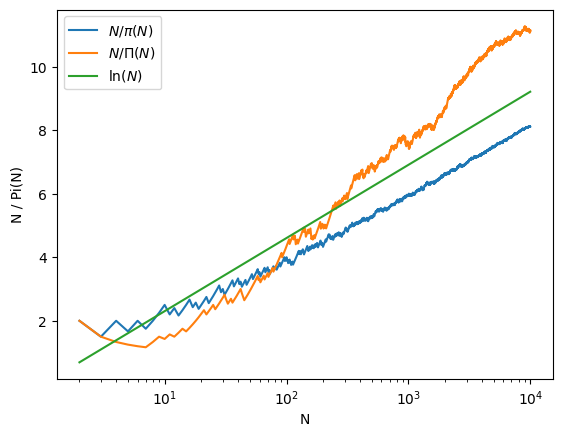

In [ ]:
plt.plot(all, N_Pi, label=r'$N/\pi(N)$')
plt.plot(model_all, model_N_Pi, label=r'$N/\Pi(N)$')
plt.plot(all, np.log(all), label=r'$\ln(N)$')
plt.xscale("log")
plt.xlabel('N')
plt.legend()
plt.ylabel('N / Pi(N)')